# Pandas homework

## Task 1

The file ./data/train.csv contains information about the number of reads with each of the 4 nucleotides at different positions (columns A, T, G, C). The task is to plot a histogram of the distribution of these numbers

In [1]:
import pandas as pd # import pandas
train_data = pd.read_csv('train.csv') # read the data
train_data.head() # view the data structure

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN


In [2]:
hist_data = train_data[['pos', 'A', 'C', 'T', 'G']] # chose the required columns
hist_data = hist_data.fillna(0) # replace NaN with 0

<AxesSubplot:xlabel='Position'>

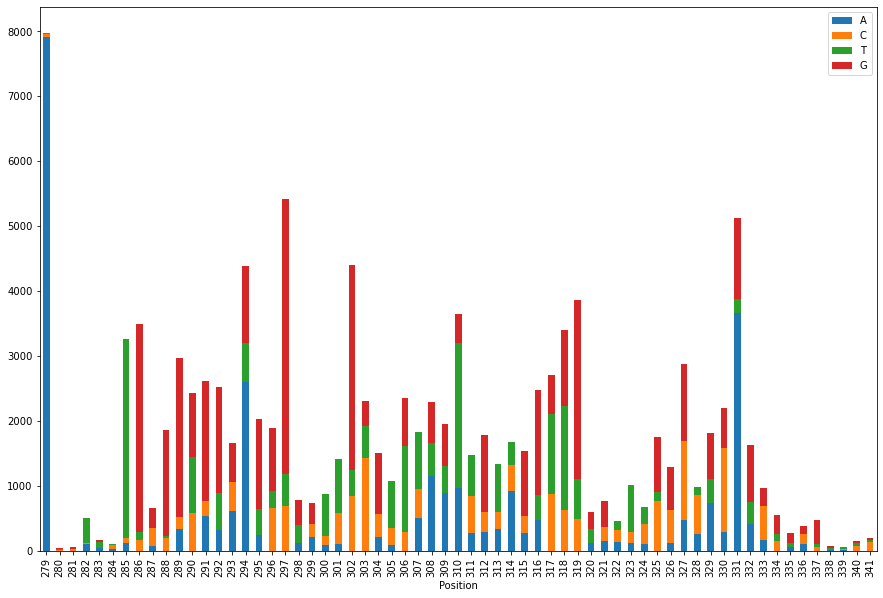

In [3]:
hist_data.plot.bar(x = 'pos', figsize = [15, 10], stacked = True, xlabel = 'Position') # plotting

## Task 2

Selecting the required data: <br>
- Save the following part from the train.csv file to the train_part.csv file:<br>
- Rows where matches are greater than the mean <br>
- Columns pos, reads_all, mismatches, deletions, insertions

In [4]:
train_part = train_data[train_data['matches'] > train_data['matches'].mean()][['pos', 'reads_all', 'mismatches', 'deletions', 'insertions']] # chose the data
train_part.to_csv('train_part.csv') # create csv output

## Task 3

The task is to perform EDA <br>
Conducting an Explorative Data Analysis of some dataset. I chosed IrisData

In [5]:
from pydataset import data 
iris_data = data('iris') # importing the dataset
iris_data.info() # view the key info about the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
iris_data.head() # view structure

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [7]:
iris_data.describe() # the key statistics

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
corr = iris_data.corr()
corr.style.background_gradient() # correlation plot

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


So we see strong posotive correlation between Sepal.Length and Petal.Length, Sepal.Length and Petal.Width, Petal.Length and Petal.Width

<AxesSubplot:ylabel='Density'>

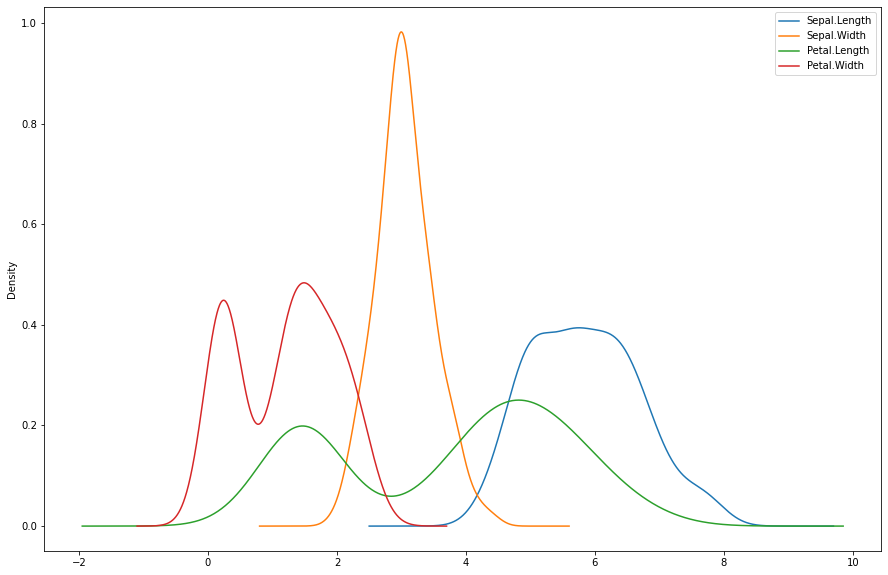

In [9]:
iris_data.plot.kde(figsize = [15, 10]) # look at destributions

We see some of the destributions have more then one peak. Apparently, the data is divided into several groups. Let's look at the distribution by species.

Species
setosa        AxesSubplot(0.125,0.125;0.775x0.755)
versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
virginica     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

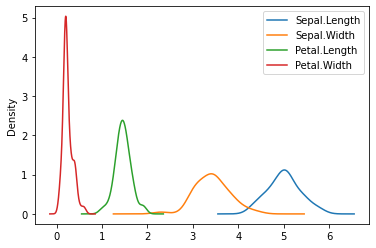

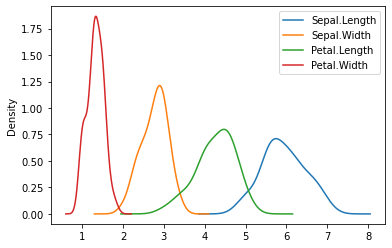

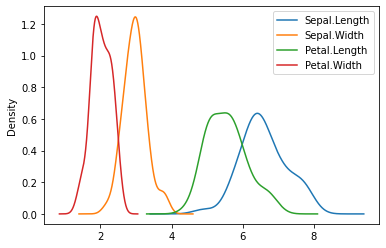

In [11]:
iris_data.groupby('Species').plot(kind='kde')

Now the distributions are unimodal

Let's build boxplots grouped by species

array([[<AxesSubplot:title={'center':'Petal.Length'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'Petal.Width'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'Sepal.Length'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'Sepal.Width'}, xlabel='[Species]'>]],
      dtype=object)

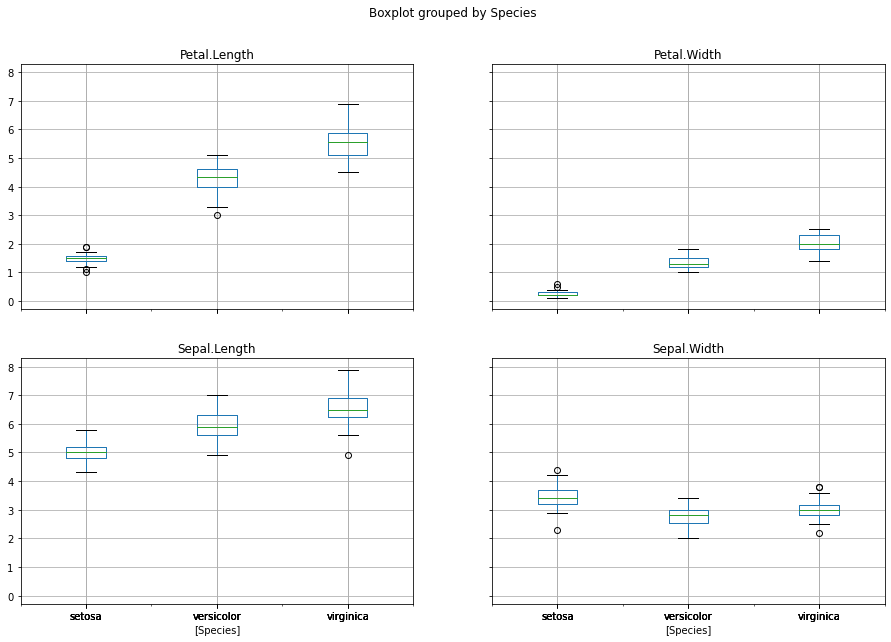

In [12]:
iris_data.boxplot(figsize = [15, 10], by = 'Species')

We see that the length of petal of versicolor and virginics significantly exceeds the length of petal of setosa. The same is correct petal width